In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 18
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.rcParams['mathtext.fontset'] = 'cm'
%load_ext autoreload
%autoreload 2

In [3]:
def loc_1D_gradient(image_properties, b_array, b_fixed=0):
    '''
    output dimensions: (len(z) x len(x), 5)
    '''
    b_3d = np.zeros((len(b_array), 3))
    b_3d[:, image_properties['fixed_axis']] = b_fixed * np.ones(len(b_array))
    b_3d[:, image_properties['main_axis']] = b_array
    
    if image_properties['gradient_along'] == 'z' and len(b_array) == len(image_properties['z']):
        loc_x = np.zeros(len(image_properties['z']))
        loc = np.array([loc_x, image_properties['z']]).transpose()
        b = b_3d
        
    elif image_properties['gradient_along'] == 'x' and len(b_array) == len(image_properties['x']):
        loc_z = np.zeros(len(image_properties['x']))
        loc = np.array([image_properties['x'], loc_z]).transpose()
    else:
        print("ERROR: dimension mismatched")
    return np.hstack((loc, b_3d))

# Generate config files: velocity samples and b-fields
## 1. Basic $b_z$ gradient

In [13]:
bz = np.linspace(0, 75, 151)
bx = by = np.zeros(len(bz))
b = np.array([bx, by, bz]).transpose()
np.save("./configs/bz_linear_75.npy", b)

In [2]:
bz = np.linspace(-25, 25, 51)
np.save("./configs/bz_2Dmap_25.npy", bz)

In [3]:
bz

array([-25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,  20.,  21.,  22.,  23.,  24.,  25.])

## 2. $b_z$ gradient with offset

In [14]:
bz = np.linspace(0, 75, 151)
by = np.zeros(len(bz))
bx = 10 * np.ones(len(bz))
b = np.array([bx, by, bz]).transpose()
np.save("./configs/bz_linear_75_bx_10.npy", b)

## 3. Load Hongquan's data and divide it by 2

In [17]:
b_old = np.load("./configs/bz_frames_2.npy")
b_new = b_old / 2
np.save("./configs/bz_frames_2_new.npy", b_new)

## 4. $v_x$ sampling

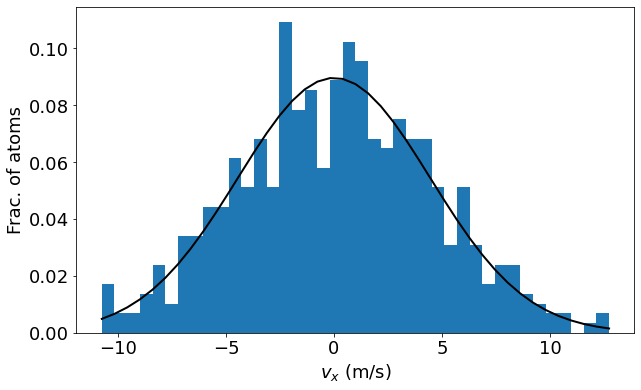

In [14]:
k_B = 1.38e-23
T = 450 + 273.15
m = 174 * 1.67e-27

sigma = 2 * 0.017 * np.sqrt(k_B * T / (2 * m))
# assuming width of the transverse velocity is 2 x 17mrad x width of longitudinal v

# sigma = 4.93 # estimate from the distribution of v_r and v_z

vx = np.random.normal(0, sigma, 500)

fig, ax = plt.subplots()
count, bins, ignored = plt.hist(vx, 40, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * sigma**2) ),
         linewidth=2, color='k')
ax.set_xlabel("$v_x$ (m/s)")
ax.set_ylabel("Frac. of atoms")
plt.show()

In [2]:
vx = np.array([0, 0.1]) # 2 atoms
np.save("./configs/vx_input_2.npy", vx)

In [3]:
vx

array([0. , 0.1])

In [ ]:
np.save("./configs/bz_frames_2_new.npy", b_new)